In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Discrete random walk: Diffusion through a crack

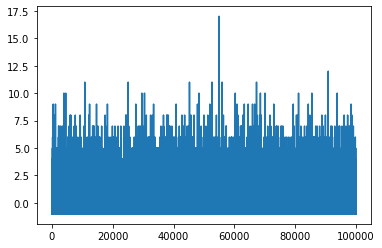

In [11]:
p = 0.5
position = 0
distance = list()
for i in range(100000):
    if position == -4:
        position = -3
        distance.append(position)
    else:
        if random.random() < p:
            position += 1
            distance.append(position)
        else: 
            position =- 1
            distance.append(position)
#print(distance)
plt.plot(distance)

(array([7.5323e+04, 1.8637e+04, 4.5930e+03, 1.1140e+03, 1.7900e+02,
        1.2000e+02, 2.7000e+01, 3.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([-1. ,  0.8,  2.6,  4.4,  6.2,  8. ,  9.8, 11.6, 13.4, 15.2, 17. ]),
 <a list of 10 Patch objects>)

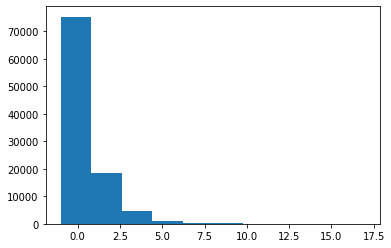

In [12]:
plt.hist(distance)

## Gaussian random walk

In [13]:
from numpy.random import normal


lmbda = 0.1
sigma = 0.3
S0 = 100
T = 90

def gaussian_random_walk(lmbda, sigma, S0, T):
    S = S0
    t_change = 1/365
    for i in range(T):
        W_change = normal(0, t_change ** 0.5)
        S += S * (lmbda * t_change + sigma * W_change)

    return S

In [14]:
def sample_gaussian(trials = 10000, lmbda = lmbda, sigma = sigma, S0 = S0, T = T):
    prices = []
    log_prices = []
    for _ in range(trials):
        price = gaussian_random_walk(lmbda, sigma, S0, T)
        prices.append(price)
        log_prices.append(np.log10(price))

    plt.hist(prices)
    plt.xlabel("Final price")
    plt.ylabel("Frequency")
    plt.title(f"Price distribution after {T} days with starting price {S0}")
    plt.show()

    plt.hist(log_prices)
    plt.xlabel("Base 10 of Final price")
    plt.ylabel("Frequency")
    plt.title(f"Logarithmic distribution of prices after {T} days with starting price {S0}")
    plt.show()

    return np.mean(prices), np.std(prices)

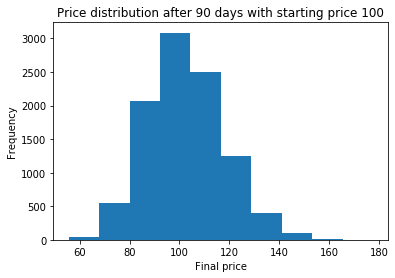

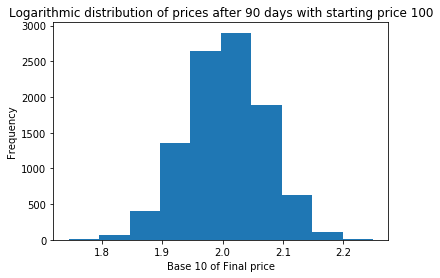

(102.42222846834406, 15.316170110031829)

In [15]:
sample_gaussian()